In [1]:
using Plots, LaTeXStrings, LinearAlgebra, Plots, SparseArrays, Printf
using NAJ

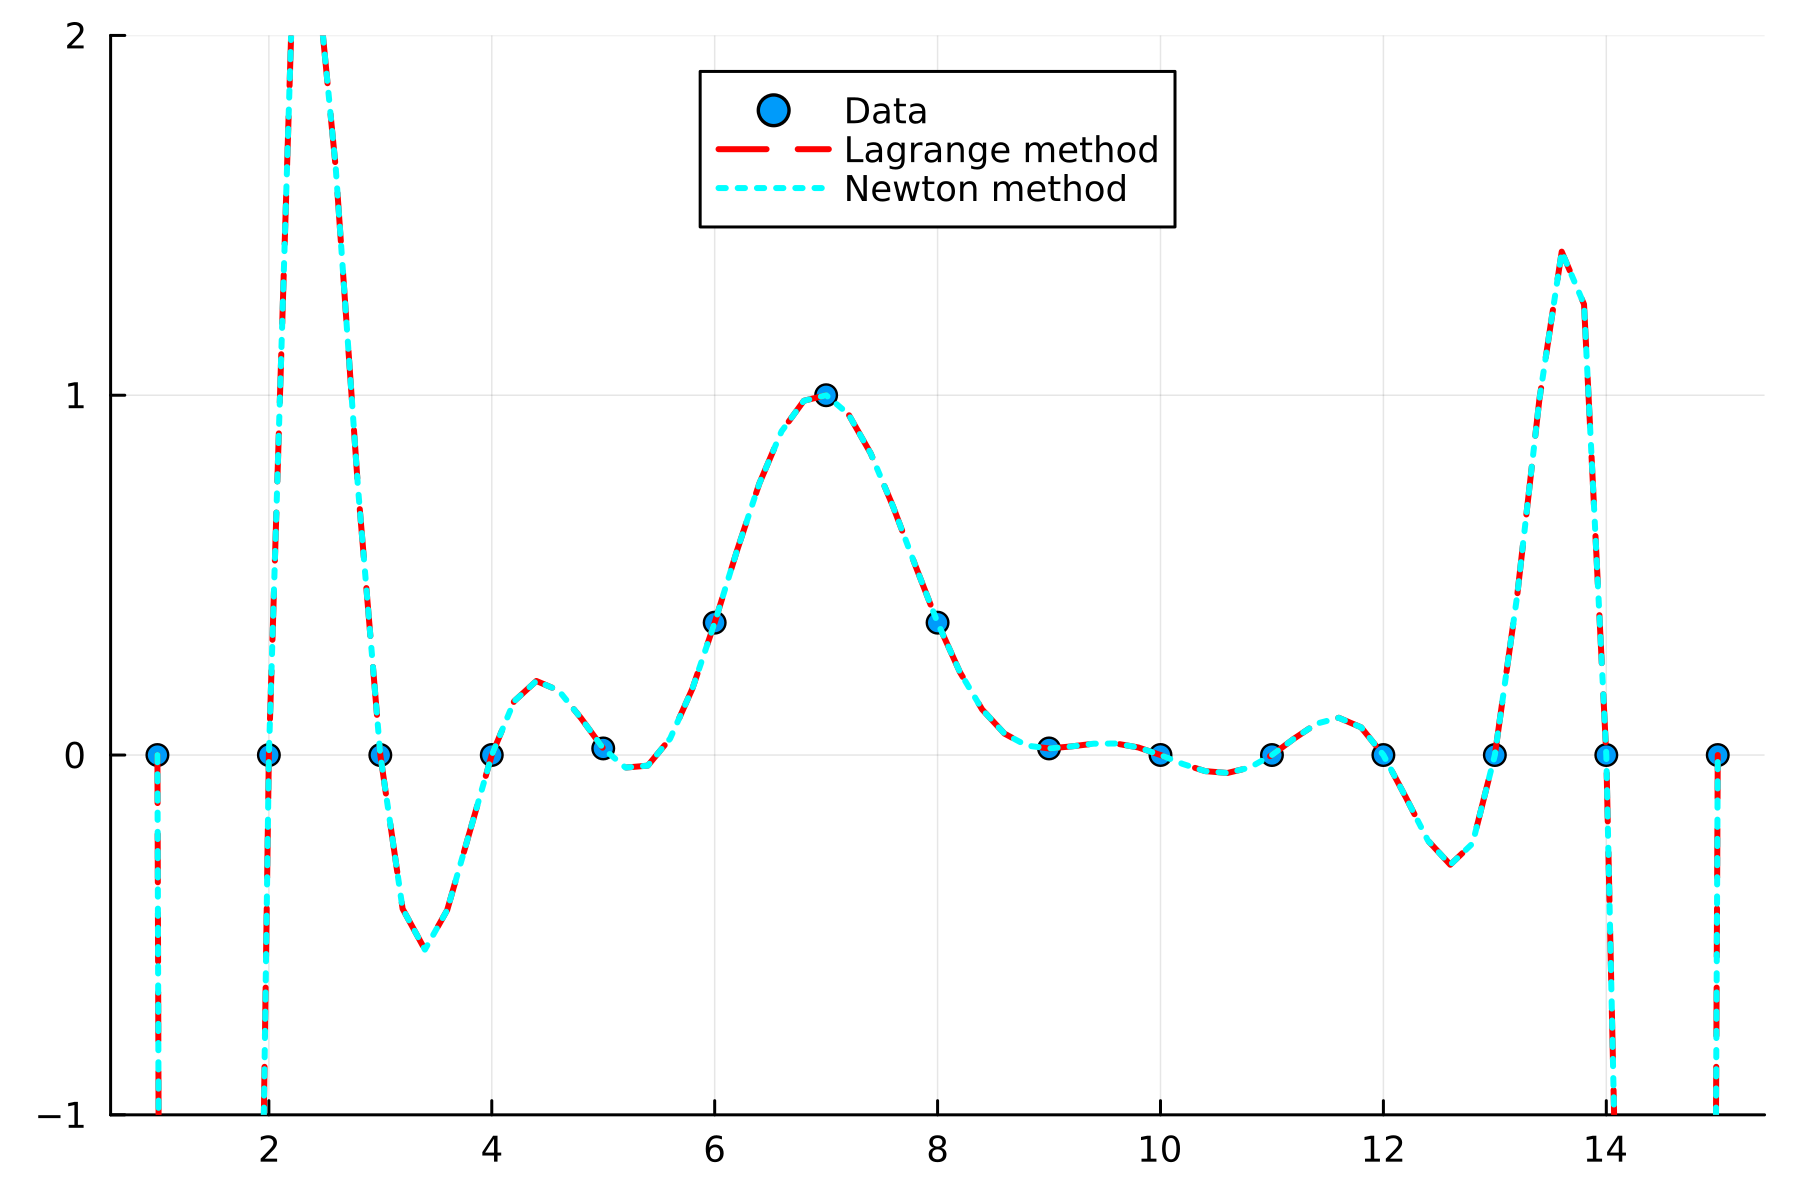

In [2]:
xx = 1.0:1.0:15.0
x1 = 1.0:0.2:15.0
yy = exp.(.-(xx .- 7.0).^2 ./ 1) 
l1 = lagrange_polynomial(xx, yy)
l2 = newton_polynomial(xx, yy)
scatter(xx, yy, ylim=(-1, 2), ms=4, legend=:top, label="Data", dpi=300)
plot!(x1, l1.(x1), lw=2, lc=:red, ls=:dash, label = "Lagrange method")
plot!(x1, l2.(x1), lw=2, lc=:cyan, ls=:dot, label = "Newton method")
#savefig("interpolation_oscillation.png")


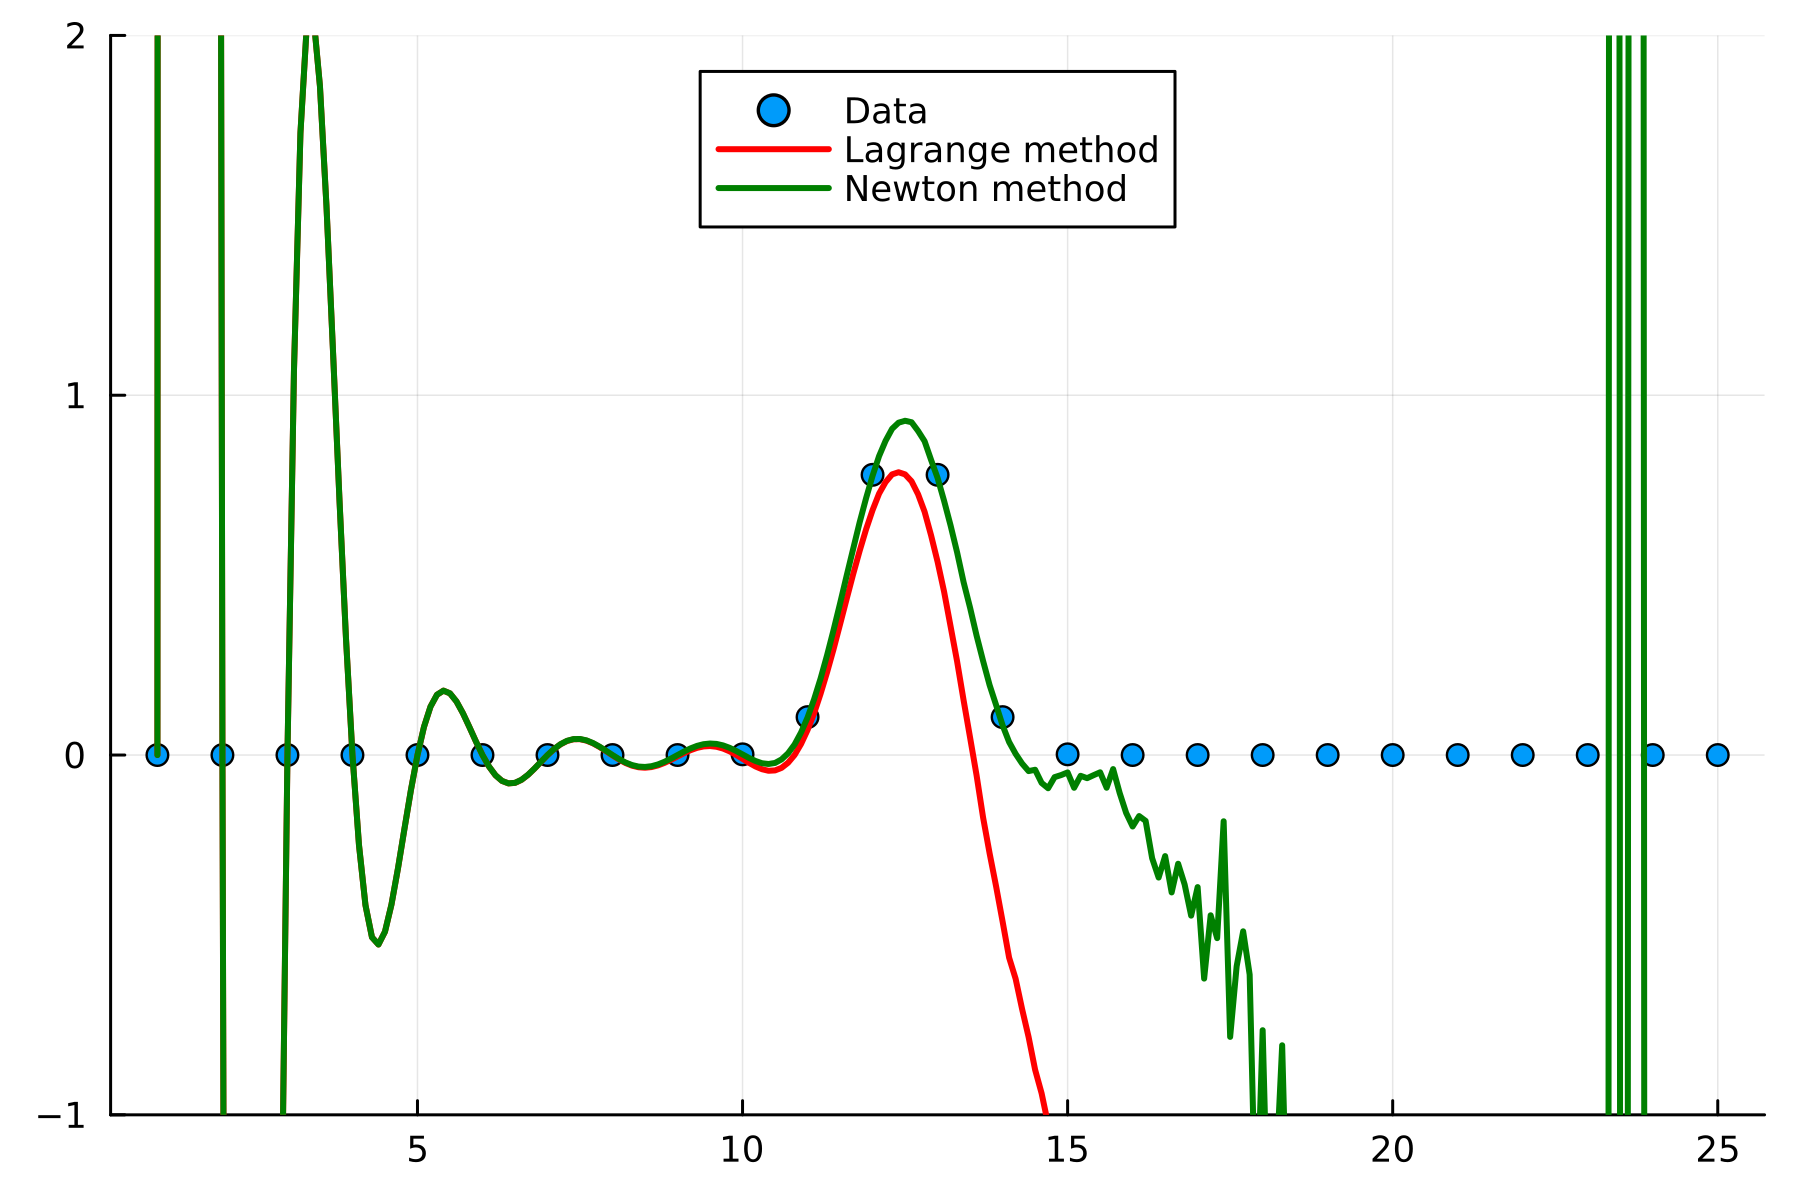

In [4]:
D=25.0
xx = 1.0:1.0:D
x1 = 1.0:0.1:D
yy = exp.(.-(xx .- D/2.0).^2 ./ (sqrt(D)/5.0)) 
l1 = lagrange_polynomial(xx, yy)
l2 = newton_polynomial(xx, yy)
scatter(xx, yy, ylim=(-1, 2), ms=4, legend=:top, label="Data", dpi=300)
plot!(x1, l1.(x1), lw=2, lc=:red, label = "Lagrange method")
plot!(x1, l2.(x1), lw=2, lc=:green, label = "Newton method")
#savefig("interpolation_oscillation2.png")

In [5]:
factorial(x::Int64) = (x<=0) ? error("Input should be positive") : ((x==1) ? 1 : x*factorial(x-1))


factorial (generic function with 1 method)

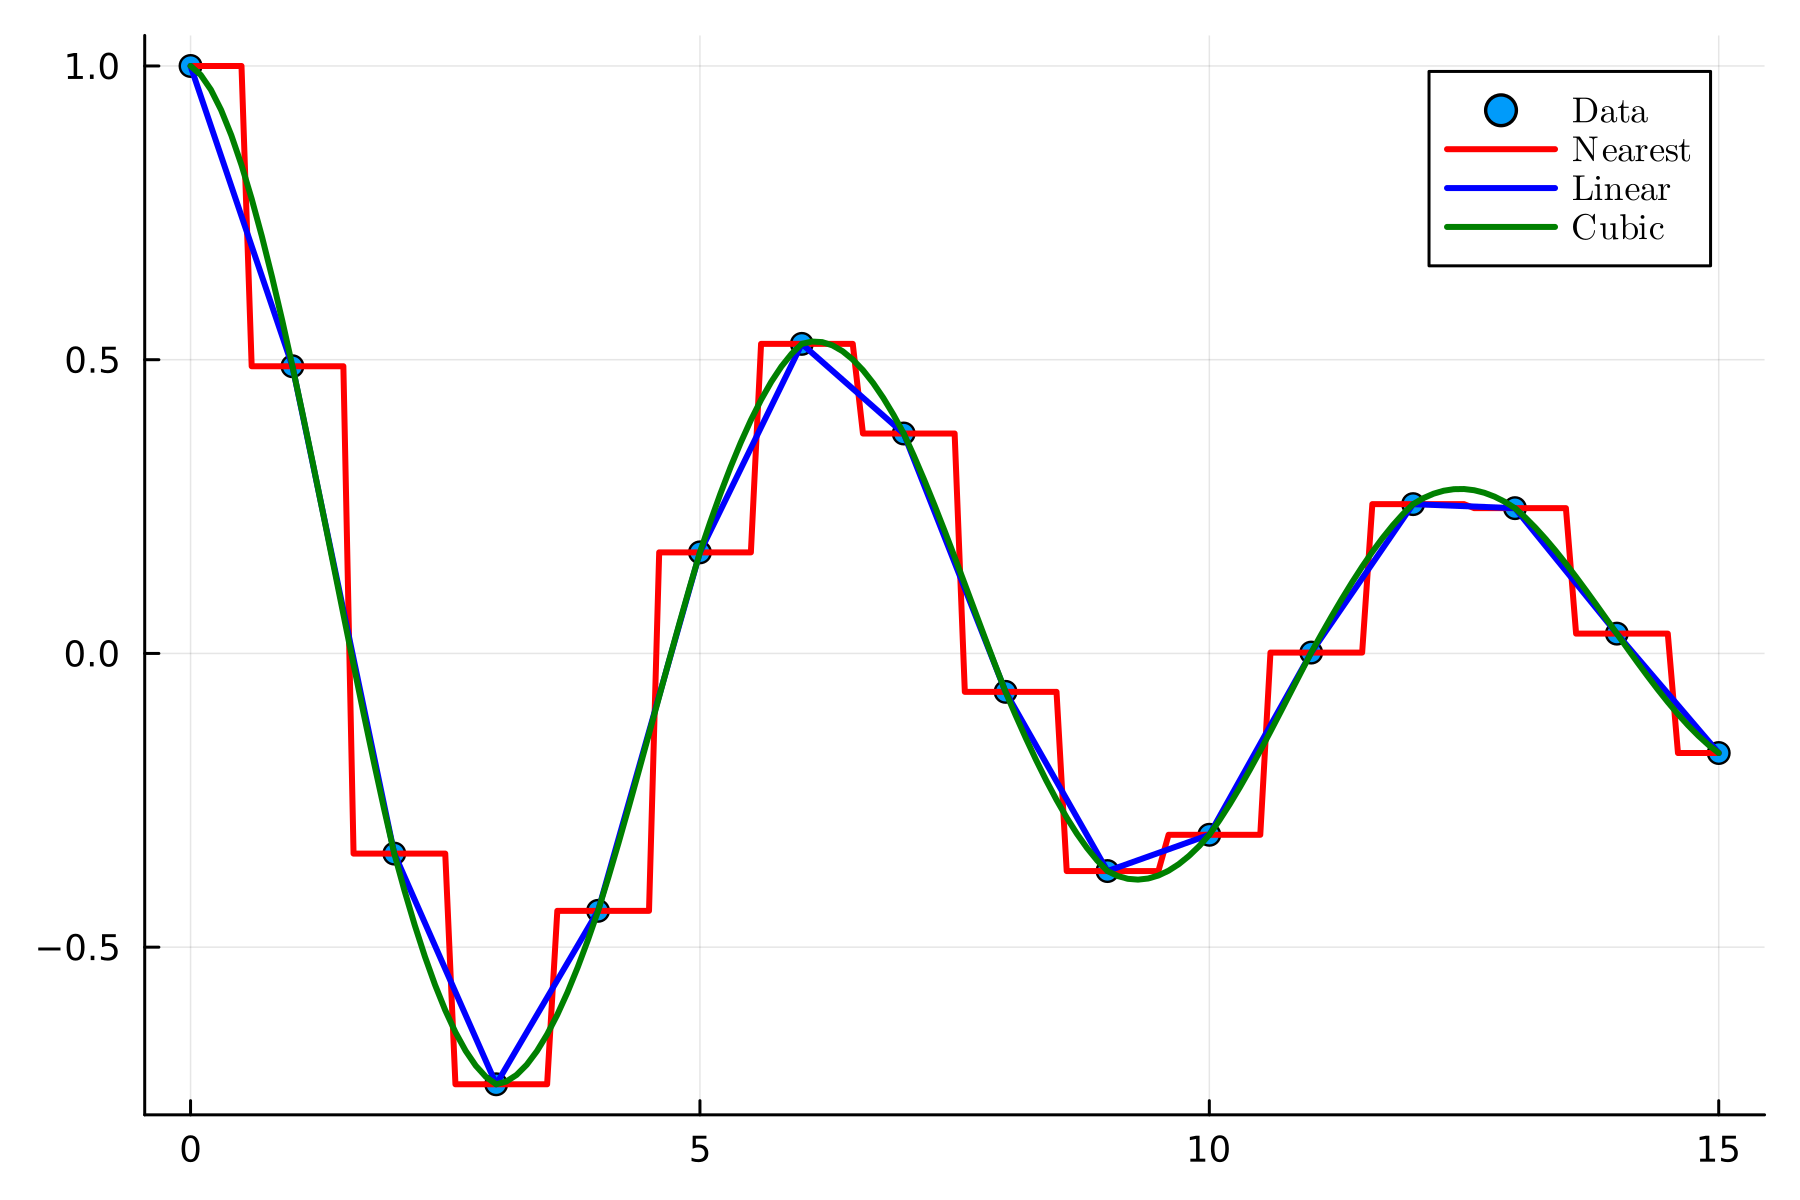

In [7]:
xp = 0.0:1.0:15.0 # change step to vector
yp = cos.(xp) .* exp.(-xp/10.0)
xt = 0.0:0.1:15.0 # change step to vector
scatter(xp, yp, label = L"\mathrm{Data}", dpi=300)
interp1 = Interpolator1D(xp, yp, :nearest)
interp2 = Interpolator1D(xp, yp, :linear)
interp3 = Interpolator1D(xp, yp, :cubic)
plot!(xt, interp1.(xt), lw=2, lc=:red, label=L"\mathrm{Nearest}")
plot!(xt, interp2.(xt), lw=2, lc=:blue, label=L"\mathrm{Linear}")
plot!(xt, interp3.(xt), lw=2, lc=:green, label=L"\mathrm{Cubic}")

#savefig("Interpolation.png")


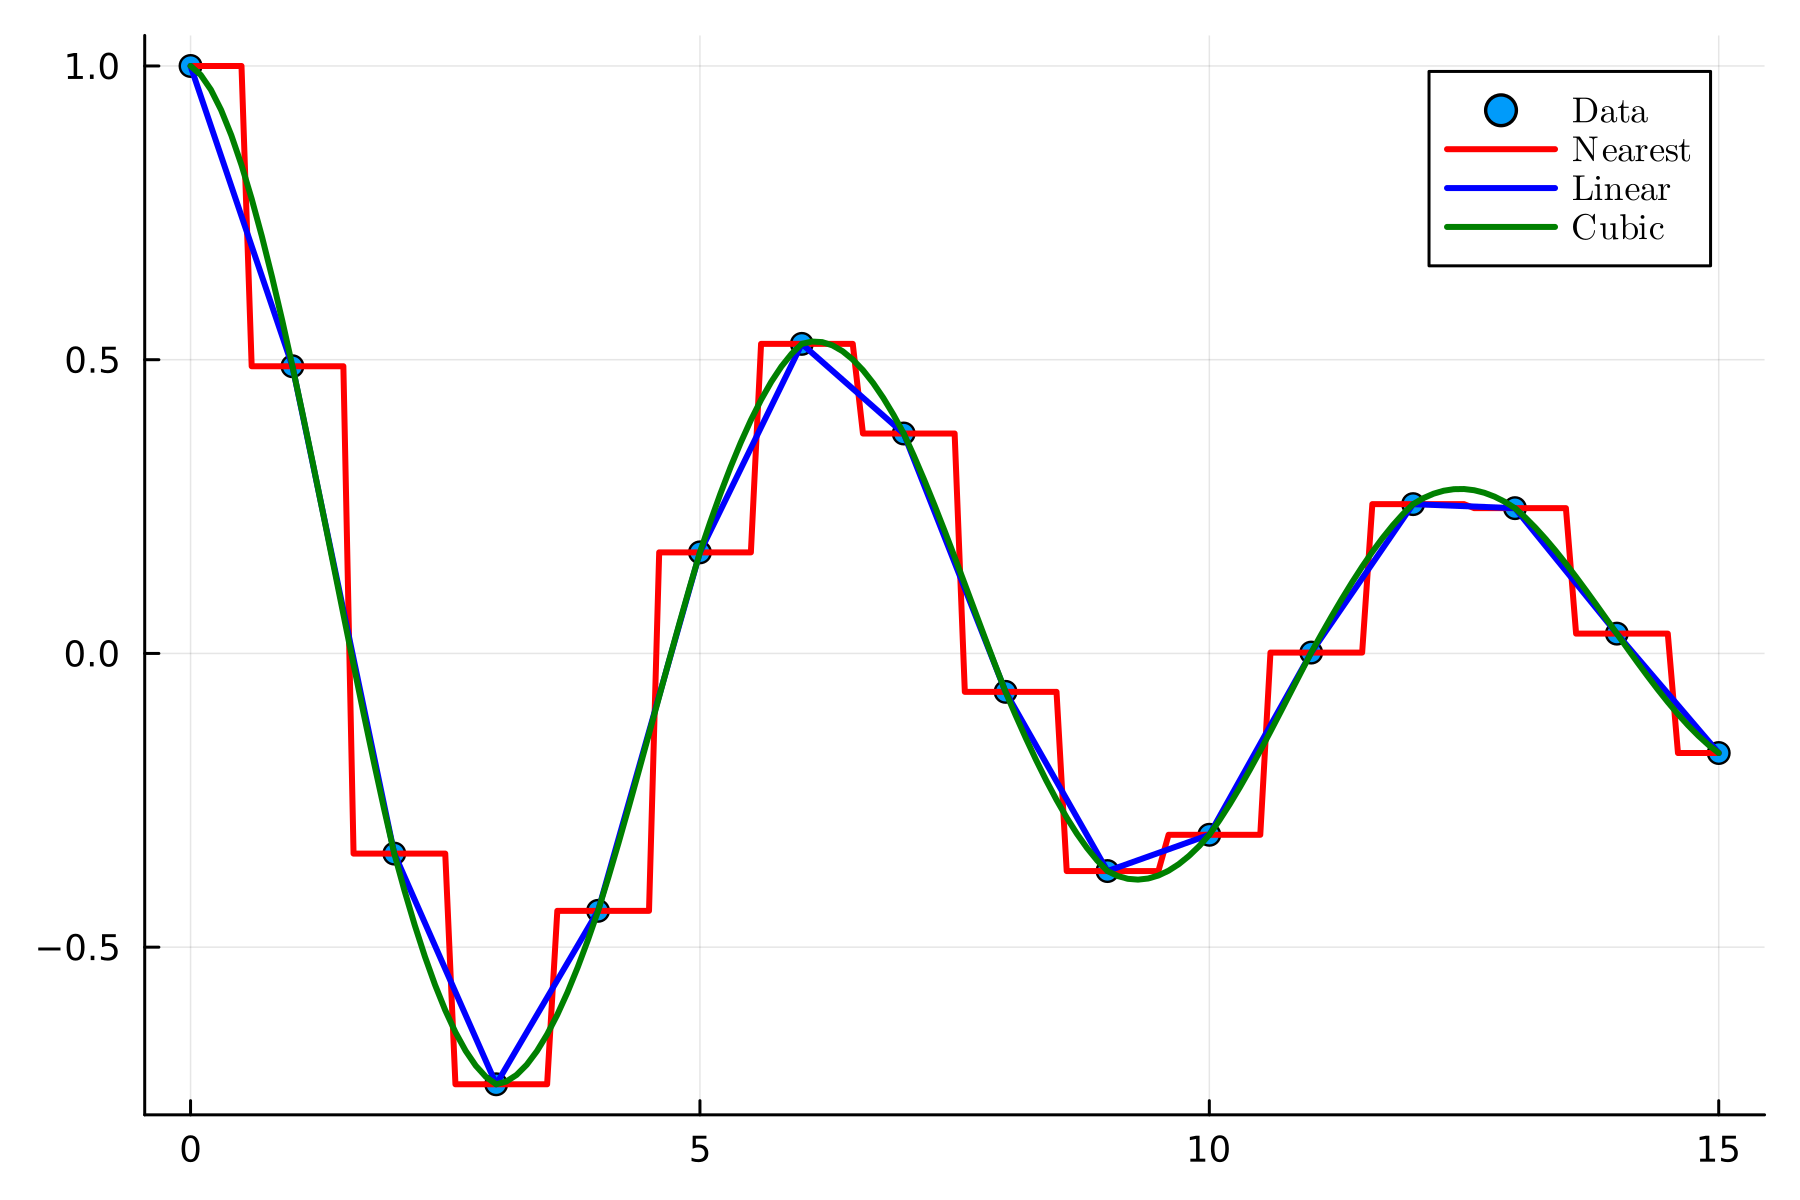

In [8]:
xp = 0.0:1.0:15.0 # change step to vector
yp = cos.(xp) .* exp.(-xp/10.0)
xt = 0.0:0.1:15.0 # change step to vector

interp1=Interpolator1D(xp, yp, :nearest)
interp2=Interpolator1D(xp, yp, :linear)
interp3=Interpolator1D(xp, yp, :cubic)

scatter(xp, yp, label = L"\mathrm{Data}", dpi=300)
plot!(xt, interp1.(xt), lw=2, lc=:red, label=L"\mathrm{Nearest}")
plot!(xt, interp2.(xt), lw=2, lc=:blue, label=L"\mathrm{Linear}")
plot!(xt, interp3.(xt), lw=2, lc=:green, label=L"\mathrm{Cubic}")

In [9]:
function cubic_spline(xp::AbstractVector{T}, yp::Vector{T}, x::AbstractVector{S}) where {T<:Real, S<:Real}
    @assert length(xp) == length(yp)
    N = length(xp)
    M = zeros(T, (4*N-4, 4*N-4))
    Y = zeros(T, (4*N-4,))
    
    M[1, 1:4] = [one(T) xp[1] (xp[1])^2 (xp[1])^3 ]
    M[2, 1:4] = [one(T) xp[2] (xp[2])^2 (xp[2])^3 ]
    M[3, 2:4] = [one(T) 2*xp[1] 3*(xp[1])^2]

    Y[1] = yp[1]
    Y[2] = yp[2]

    for i in 2:N-1 
        M[4*(i-1), 4*(i-1)+1:4*i] = [one(T) xp[i] (xp[i])^2 (xp[i])^3]
        M[4*(i-1)+1, 4*(i-1)+1:4*i] = [one(T) xp[i+1] (xp[i+1])^2 (xp[i+1])^3]
        M[4*(i-1)+2, 4*(i-1)-2:4*i] = [-one(T) -2*xp[i] -3*(xp[i])^2 zero(T) one(T) 2*xp[i] 3*(xp[i])^2]
        M[4*(i-1)+3, 4*(i-1)-1:4*i] = [ -2*one(T) -6*(xp[i]) zero(T) zero(T) 2*one(T) 6*(xp[i])]
        Y[4*(i-1)] = yp[i]
        Y[4*(i-1)+1] = yp[i+1]
    end
    M[end, end-2:end] = [one(T) 2*xp[end] 3*(xp[end])^2] 

    A = M\Y
    y = zeros(T, size(x))

    for (i, v) in enumerate(x)
        if v < xp[1] || v > xp[end]

        else
            ind = findfirst(xs->(xs>=v), xp)-1
            if ind == 0
                y[i] = yp[1]
            else 
                y[i] = evalpoly(v, A[4*ind-3:4*ind])
            end
        end
    end
    return y
end


cubic_spline (generic function with 1 method)

In [10]:
yy = cubic_spline(xp, yp, xt)

151-element Vector{Float64}:
  1.0
  0.9931627028813202
  0.9734179913264747
  0.9419166350372538
  0.899809403715448
  0.8482470670628481
  0.7883803947812444
  0.7213601565724276
  0.6483371221381878
  0.5704620611803161
  ⋮
 -0.023314984071133964
 -0.0514051932182173
 -0.07820287304232622
 -0.10295201371223506
 -0.12489660539676069
 -0.14328063826487522
 -0.15734810248540632
 -0.16634298822714955
 -0.16950928565914225

In [11]:
xp = 0.0:0.75:15.0 # change step to vector
yp = cos.(3 .* xp) .* exp.(-xp/10.0)
yp[8:9]=[-0.15 -0.3]# 
xt = 0.0:0.1:15.0 # change step to vector

interp1=Interpolator1D(xp, yp, :nearest)
interp2=Interpolator1D(xp, yp, :linear)
interp3=Interpolator1D(xp, yp, :cubic)

scatter(xp, yp, label = L"\mathrm{Data}", dpi=300)
# plot!(xt, interp1.(xt), lw=2, lc=:red, label=L"\mathrm{Nearest}")
# plot!(xt, interp2.(xt), lw=2, lc=:blue, label=L"\mathrm{Linear}")
plot!(xt, interp3.(xt), lw=2, lc=:green, label=L"\mathrm{Cubic}")
plot!(xt, cubic_spline_naturalbc(xp, yp, xt), lw=2, lc=:red, label=L"\mathrm{Cubic\;Spline\;with\;natural\;BC}")
plot!(xt, cubic_spline_clampedbc(xp, yp, xt, (1.0, -1.0)), lw=2, lc=:cyan, label=L"\mathrm{Cubic\;Spline\;with\;clamped\;BC}")

UndefVarError: UndefVarError: `cubic_spline_naturalbc` not defined

In [12]:
function cubic_spline_natural(xp::AbstractVector{T}, yp::Vector{T}, x::AbstractVector{S}) where {T<:Real, S<:Real}
    @assert length(xp) == length(yp)
    N = length(xp)
    M = zeros(T, (4*N-4, 4*N-4))
    Y = zeros(T, (4*N-4, 1))
    for i in 1:N-2 
        M[4*(i-1)+1, (4*(i-1)+1):4*i] = [one(T) xp[i] (xp[i])^2 (xp[i])^3]
        M[4*(i-1)+2, 4*(i-1)+1:4*i] = [one(T) xp[i+1] (xp[i+1])^2 (xp[i+1])^3]
        M[4*(i-1)+3, 4*(i-1)+2:4*(i+1)] = [1 2*xp[i+1] 3*(xp[i+1])^2 0 -1 -2*xp[i+1] -3*(xp[i+1])^2]
        M[4*(i-1)+4, 4*(i-1)+3:4*(i+1)] = [2 6*(xp[i+1]) 0 0 -2 -6*(xp[i+1])]
        
        Y[4*(i-1)+1] = yp[i]
        Y[4*(i-1)+2] = yp[i+1]
        
        if i == N-2
            println(4*N-4, ", ", 4*(i-1)+4)
        end
    end
    M[end-3, end-3:end] = [one(T) xp[end-1] (xp[end-1])^2 (xp[end-1])^3] 
    M[end-2, end-3:end] = [one(T) xp[end] (xp[end])^2 (xp[end])^3] 
    M[end-1, 3:4] = [2 6*xp[1]]
    M[end, end-1:end] = [2 6*xp[end]]
    Y[end-3] = yp[end-1]
    Y[end-2]=  yp[end]
    
    A = M\Y
    y = zeros(T, size(x))

    for (i, v) in enumerate(x)
        if v < xp[1] || v > xp[end]

        else
            ind = findfirst(xs->(xs>=v), xp)-1
            if ind == 0
                y[i] = yp[1]
            else 
                y[i] = evalpoly(v, A[4*ind-3:4*ind])
            end
        end
    end
    return y
end

function cubic_spline_clamped(xp::AbstractVector{T}, yp::Vector{T}, x::AbstractVector{S}, bc) where {T<:Real, S<:Real}
    @assert length(xp) == length(yp)
    N = length(xp)
    M = zeros(T, (4*N-4, 4*N-4))
    Y = zeros(T, (4*N-4, 1))
    for i in 1:N-2 
        M[4*(i-1)+1, (4*(i-1)+1):4*i] = [one(T) xp[i] (xp[i])^2 (xp[i])^3]
        M[4*(i-1)+2, 4*(i-1)+1:4*i] = [one(T) xp[i+1] (xp[i+1])^2 (xp[i+1])^3]
        M[4*(i-1)+3, 4*(i-1)+2:4*(i+1)] = [1 2*xp[i+1] 3*(xp[i+1])^2 0 -1 -2*xp[i+1] -3*(xp[i+1])^2]
        M[4*(i-1)+4, 4*(i-1)+3:4*(i+1)] = [2 6*(xp[i+1]) 0 0 -2 -6*(xp[i+1])]
        
        Y[4*(i-1)+1] = yp[i]
        Y[4*(i-1)+2] = yp[i+1]
        
        if i == N-2
            println(4*N-4, ", ", 4*(i-1)+4)
        end
    end
    M[end-3, end-3:end] = [one(T) xp[end-1] (xp[end-1])^2 (xp[end-1])^3] 
    M[end-2, end-3:end] = [one(T) xp[end] (xp[end])^2 (xp[end])^3] 
    M[end-1, 2:4] = [1 2*xp[1] 3(xp[1])^2]
    M[end, end-2:end] = [1 2*xp[end] 3(xp[end])^2]
    Y[end-3] = yp[end-1]
    Y[end-2]=  yp[end]
    Y[end-1] = bc[1]
    Y[end] = bc[2]
    
    A = M\Y
    y = zeros(T, size(x))

    for (i, v) in enumerate(x)
        if v < xp[1] || v > xp[end]

        else
            ind = findfirst(xs->(xs>=v), xp)-1
            if ind == 0
                y[i] = yp[1]
            else 
                y[i] = evalpoly(v, A[4*ind-3:4*ind])
            end
        end
    end
    return y
end

cubic_spline_clamped (generic function with 1 method)

80, 76


80, 76


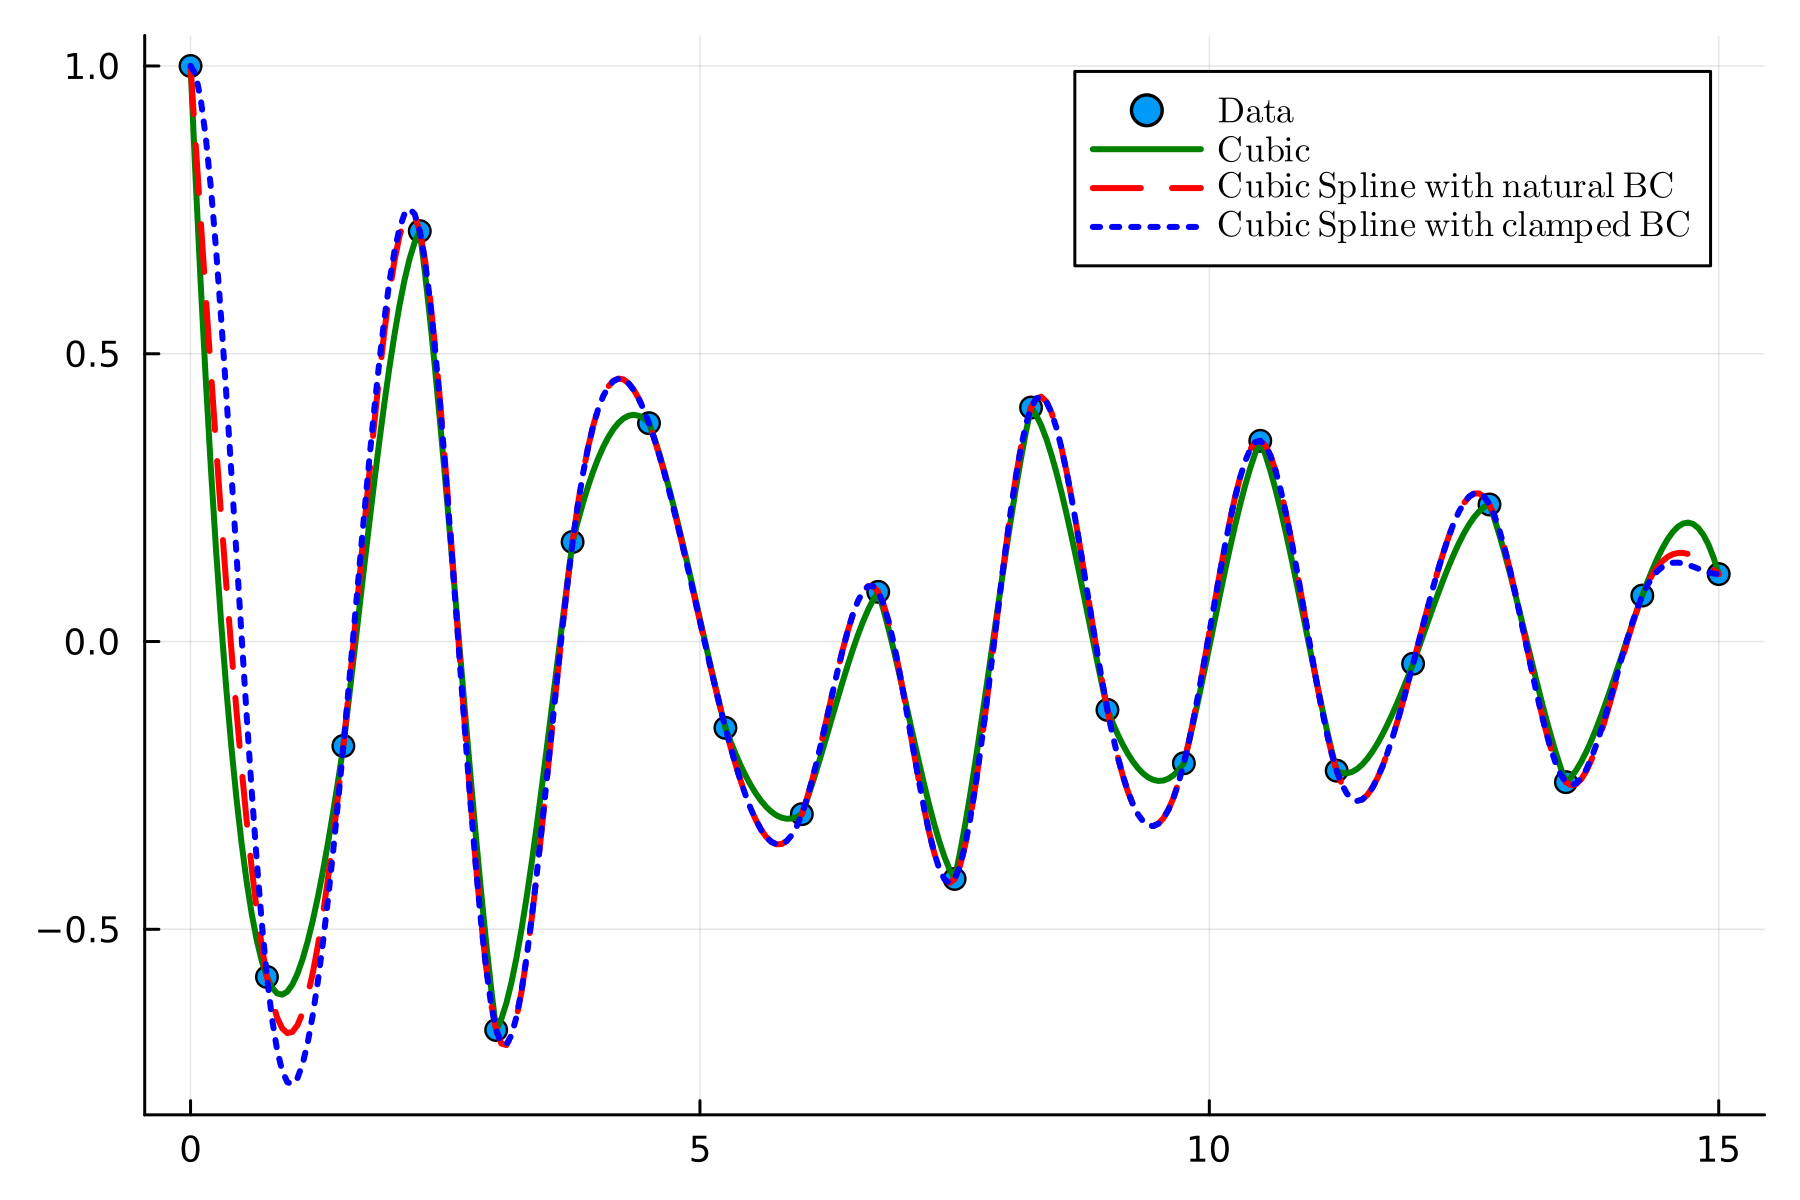

In [13]:
xp = 0.0:0.75:15.0 # change step to vector
yp = cos.(3 .* xp) .* exp.(-xp/10.0)
yp[8:9]=[-0.15 -0.3]# 
xt = 0.0:0.05:15.0 # change step to vector
# cubic_spline_natural(xp, yp, xt);

interp1=Interpolator1D(xp, yp, :cubic)
interp2=Interpolator1D(xp, yp, :cubic_spline_naturalbc)
interp3=Interpolator1D(xp, yp, :cubic_spline_clampedbc, [0.0, 0.0])

scatter(xp, yp, label = L"\mathrm{Data}", dpi=300)
plot!(xt, interp1.(xt), lw=2, lc=:green, label=L"\mathrm{Cubic}")
plot!(xt, interp2.(xt), lw=2, lc=:red, ls = :dash, label=L"\mathrm{Cubic\;Spline\;with\;natural\;BC}")
plot!(xt, interp3.(xt), lw=2, lc=:blue, ls = :dot, label=L"\mathrm{Cubic\;Spline\;with\;clamped\;BC}")

80, 76
80, 76


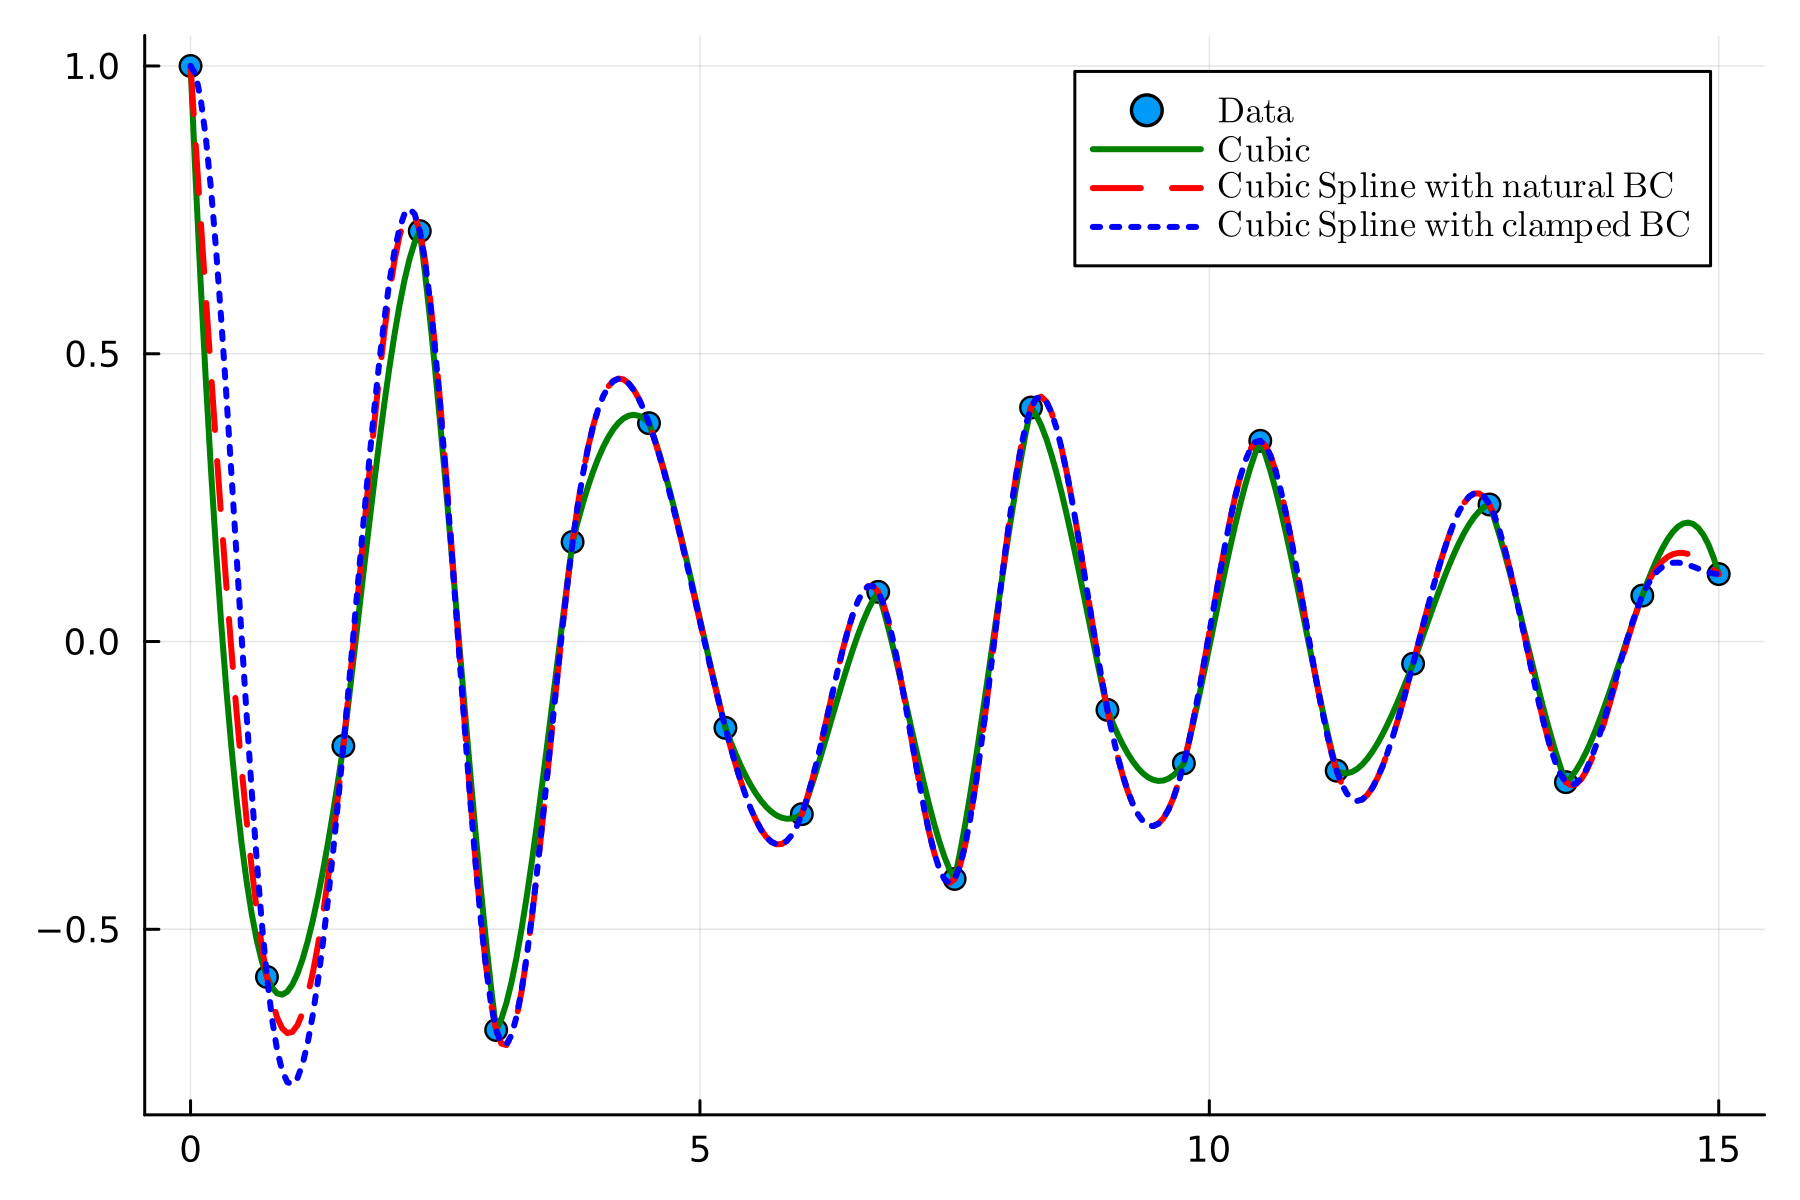

In [14]:
interp1=Interpolator1D(xp, yp, :cubic)
interp2=Interpolator1D(xp, yp, :cubic_spline_naturalbc)
interp3=Interpolator1D(xp, yp, :cubic_spline_clampedbc, [0.0, 0.0])

scatter(xp, yp, label = L"\mathrm{Data}", dpi=300)
plot!(xt, interp1.(xt), lw=2, lc=:green, label=L"\mathrm{Cubic}")
plot!(xt, interp2.(xt), lw=2, lc=:red, ls = :dash, label=L"\mathrm{Cubic\;Spline\;with\;natural\;BC}")
plot!(xt, interp3.(xt), lw=2, lc=:blue, ls = :dot, label=L"\mathrm{Cubic\;Spline\;with\;clamped\;BC}")
#savefig("test_spline.png")

In [ ]:
spzeros